## Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data exploration

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- ### Checking for missing values :

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- ### Checking for duplicate values :

In [6]:
df.duplicated().sum()

1

In [7]:
# dropping duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

- ### Seprating Numerical & Categorical Variables :

In [10]:
Num_Var = df.select_dtypes(include=[np.number])
Cat_Var = df.select_dtypes(include=[np.object])

In [11]:
Num_Var

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [12]:
Cat_Var

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


## Visual exploration of data

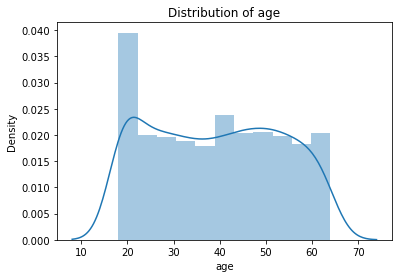

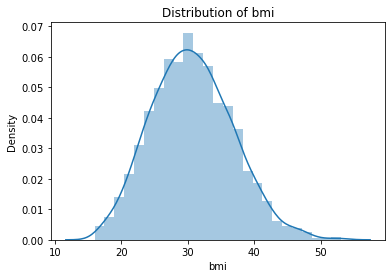

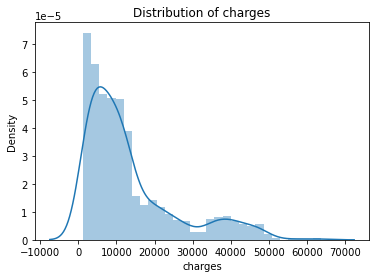

In [13]:
for column in Num_Var.drop(['children'],axis=1):
    ax = sns.distplot(df[column])
    plt.title('Distribution of '+column)
    plt.show()

Text(0.5, 1.0, 'No of Children in the family')

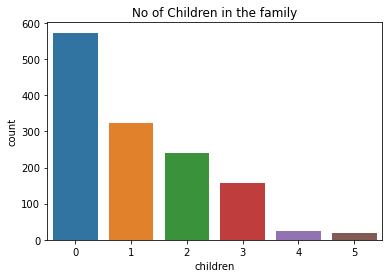

In [14]:
sns.countplot(Num_Var.children)
plt.title('No of Children in the family')

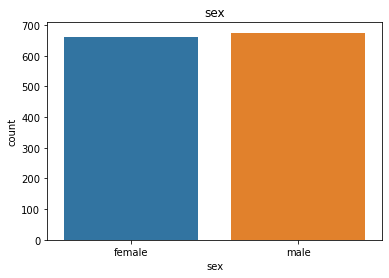

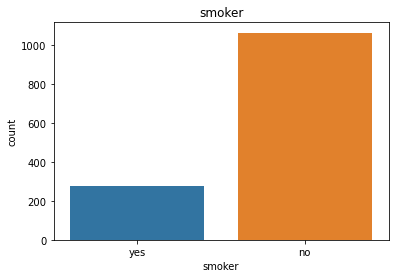

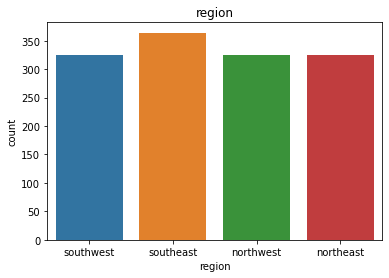

In [15]:
for column in Cat_Var:
    sns.countplot(Cat_Var[column])
    plt.title(column)
    plt.show()

<AxesSubplot:xlabel='smoker', ylabel='count'>

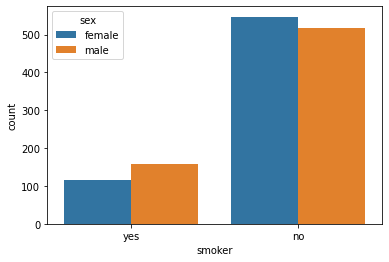

In [16]:
sns.countplot(df['smoker'],hue='sex',data=df)

In [17]:
le = LabelEncoder()

In [18]:
Cat_Var.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

<AxesSubplot:>

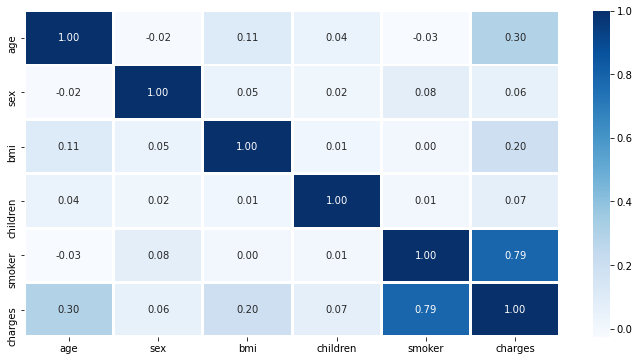

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidth=2)

In [21]:
dummies = pd.get_dummies(df['region'])
dummies

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [22]:
df = pd.concat([df,dummies],axis=1)

In [23]:
df.dtypes

age            int64
sex            int32
bmi          float64
children       int64
smoker         int32
region        object
charges      float64
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [24]:
df.drop('region',axis=1,inplace=True)

In [25]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [26]:
Y = df.charges
X = df.drop('charges',axis=1)

In [27]:
# Data standardization
sc = StandardScaler()
sc.fit(X)

X_std = pd.DataFrame(sc.transform(X),columns=X.columns)
X_std

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
1333,-1.511647,-1.009771,0.206053,-0.909234,-0.507702,1.768203,-0.565546,-0.611638,-0.566698
1334,-1.511647,-1.009771,1.014490,-0.909234,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
1335,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702,-0.565546,-0.565546,-0.611638,1.764609


In [28]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_std,Y, test_size=0.3, random_state=0)
print('Shape of Xtrain :',Xtrain.shape)
print('Shape of Xtest :',Xtest.shape)
print('Shape of Ytrain :',Ytrain.shape)
print('Shape of Ytest :',Ytest.shape)

Shape of Xtrain : (935, 9)
Shape of Xtest : (402, 9)
Shape of Ytrain : (935,)
Shape of Ytest : (402,)


#### Linear Regression

In [29]:
Lr = LinearRegression()

In [30]:
Lr.fit(Xtrain,Ytrain)

LinearRegression()

In [31]:
Ypred = Lr.predict(Xtest)

In [32]:
Prediction = pd.DataFrame({'Actual':list(Ytest),'Predicted':list(Ypred)})

In [33]:
Prediction['Squared_Error'] = ((Prediction['Actual']-Prediction['Predicted'])**2).round(2)
Prediction['Absolute_Error'] = abs(Prediction['Actual']-Prediction['Predicted'])
Prediction['Percentage_Error'] = ((abs(Prediction['Actual']-Prediction['Predicted'])/Prediction['Actual'])*100).round(2)
Prediction.head()

,Actual,Predicted,Squared_Error,Absolute_Error,Percentage_Error
0,1633.9618,5085.986075,11916471.59,3452.024275,211.27
1,8547.6913,9453.986075,821370.22,906.294775,10.60
2,9290.1395,11465.986075,4734308.32,2175.846575,23.42
3,32548.3405,26005.986075,42802401.42,6542.354425,20.10
4,9644.2525,6969.986075,7151700.91,2674.266425,27.73


In [34]:
print('Root Mean Square Error'+'('+'RMSE'+')'+':'+str(round(sqrt(Prediction.Squared_Error.mean()),2)))
print('Mean Absolute Error'+'('+'MAE'+')'+':'+str(round(Prediction.Absolute_Error.mean(),2)))
print('Mean Absolute Percentage Error'+'('+'MAPE'+')'+':'+str(round(Prediction.Percentage_Error.mean(),2))+'%')
print('R2 Value/Coefficient of Determination :',round(r2_score(Ytest,Ypred),2))

Root Mean Square Error(RMSE):6225.21
Mean Absolute Error(MAE):4242.54
Mean Absolute Percentage Error(MAPE):39.32%
R2 Value/Coefficient of Determination : 0.76


#### Ridge Regression

In [35]:
Rid_reg = Ridge(alpha=.001,normalize=True)

In [36]:
Rid_reg.fit(Xtrain,Ytrain)

Ridge(alpha=0.001, normalize=True)

In [37]:
Ypred2 = Rid_reg.predict(Xtest)

In [38]:
Prediction2 = pd.DataFrame({'Actual':list(Ytest),'Predicted':list(Ypred2)})

In [39]:
Prediction2['Squared_Error'] = ((Prediction2['Actual']-Prediction2['Predicted'])**2).round(2)
Prediction2['Absolute_Error'] = abs(Prediction2['Actual']-Prediction2['Predicted'])
Prediction2['Percentage_Error'] = ((abs(Prediction2['Actual']-Prediction2['Predicted'])/Prediction2['Actual'])*100).round(2)
Prediction2.head()

,Actual,Predicted,Squared_Error,Absolute_Error,Percentage_Error
0,1633.9618,5175.921667,12545479.70,3541.959867,216.77
1,8547.6913,9606.028805,1120078.28,1058.337505,12.38
2,9290.1395,11402.981097,4464099.62,2112.841597,22.74
3,32548.3405,26106.550279,41496661.25,6441.790221,19.79
4,9644.2525,7006.255024,6959030.68,2637.997476,27.35


In [40]:
print('Root Mean Square Error'+'('+'RMSE'+')'+':'+str(round(sqrt(Prediction2.Squared_Error.mean()),2)))
print('Mean Absolute Error'+'('+'MAE'+')'+':'+str(round(Prediction2.Absolute_Error.mean(),2)))
print('Mean Absolute Percentage Error'+'('+'MAPE'+')'+':'+str(round(Prediction2.Percentage_Error.mean(),2))+'%')
print('R2 Value/Coefficient of Determination :',round(r2_score(Ytest,Ypred2),2))

Root Mean Square Error(RMSE):6232.72
Mean Absolute Error(MAE):4242.85
Mean Absolute Percentage Error(MAPE):39.37%
R2 Value/Coefficient of Determination : 0.76


#### Lasso Regression

In [41]:
Las_reg = Lasso(alpha=.001,normalize=True)

In [42]:
Las_reg.fit(Xtrain,Ytrain)

Lasso(alpha=0.001, normalize=True)

In [43]:
Ypred3 = Las_reg.predict(Xtest)

In [44]:
Prediction3 = pd.DataFrame({'Actual':list(Ytest),'Predicted':list(Ypred3)})

In [45]:
Prediction3['Squared_Error'] = ((Prediction3['Actual']-Prediction3['Predicted'])**2).round(2)
Prediction3['Absolute_Error'] = abs(Prediction3['Actual']-Prediction3['Predicted'])
Prediction3['Percentage_Error'] = ((abs(Prediction3['Actual']-Prediction3['Predicted'])/Prediction3['Actual'])*100).round(2)
Prediction3.head()

,Actual,Predicted,Squared_Error,Absolute_Error,Percentage_Error
0,1633.9618,5166.946933,12481983.95,3532.985133,216.22
1,8547.6913,9601.081235,1109630.35,1053.389935,12.32
2,9290.1395,11400.902729,4455321.41,2110.763229,22.72
3,32548.3405,26117.915272,41350368.62,6430.425228,19.76
4,9644.2525,7001.211237,6985667.12,2643.041263,27.41


In [46]:
print('Root Mean Square Error'+'('+'RMSE'+')'+':'+str(round(sqrt(Prediction3.Squared_Error.mean()),2)))
print('Mean Absolute Error'+'('+'MAE'+')'+':'+str(round(Prediction3.Absolute_Error.mean(),2)))
print('Mean Absolute Percentage Error'+'('+'MAPE'+')'+':'+str(round(Prediction3.Percentage_Error.mean(),2))+'%')
print('R2 Value/Coefficient of Determination :',round(r2_score(Ytest,Ypred3),2))

Root Mean Square Error(RMSE):6231.59
Mean Absolute Error(MAE):4240.87
Mean Absolute Percentage Error(MAPE):39.33%
R2 Value/Coefficient of Determination : 0.76


#### Elastic Net

In [47]:
Elas = ElasticNet(alpha=.001,normalize=True)

In [48]:
Elas.fit(Xtrain,Ytrain)

ElasticNet(alpha=0.001, normalize=True)

In [49]:
Ypred4 = Elas.predict(Xtest)

In [50]:
Prediction4 = pd.DataFrame({'Actual':list(Ytest),'Predicted':list(Ypred4)})

In [51]:
Prediction4['Squared_Error'] = ((Prediction4['Actual']-Prediction4['Predicted'])**2).round(2)
Prediction4['Absolute_Error'] = abs(Prediction4['Actual']-Prediction4['Predicted'])
Prediction4['Percentage_Error'] = ((abs(Prediction4['Actual']-Prediction4['Predicted'])/Prediction4['Actual'])*100).round(2)
Prediction4.head()

,Actual,Predicted,Squared_Error,Absolute_Error,Percentage_Error
0,1633.9618,7965.023510,4.008234e+07,6331.061710,387.47
1,8547.6913,11026.858538,6.146270e+06,2479.167238,29.00
2,9290.1395,12028.074789,7.496290e+06,2737.935289,29.47
3,32548.3405,22365.514295,1.036899e+08,10182.826205,31.29
4,9644.2525,8669.885731,9.493906e+05,974.366769,10.10


In [52]:
print('Root Mean Square Error'+'('+'RMSE'+')'+':'+str(round(sqrt(Prediction4.Squared_Error.mean()),2)))
print('Mean Absolute Error'+'('+'MAE'+')'+':'+str(round(Prediction4.Absolute_Error.mean(),2)))
print('Mean Absolute Percentage Error'+'('+'MAPE'+')'+':'+str(round(Prediction4.Percentage_Error.mean(),2))+'%')
print('R2 Value/Coefficient of Determination :',round(r2_score(Ytest,Ypred4),2))

Root Mean Square Error(RMSE):7405.66
Mean Absolute Error(MAE):5363.14
Mean Absolute Percentage Error(MAPE):68.18%
R2 Value/Coefficient of Determination : 0.67


#### Random Forest

In [53]:
RF_reg = RandomForestRegressor()

In [54]:
RF_reg.fit(Xtrain,Ytrain)

RandomForestRegressor()

In [55]:
Ypred5 = RF_reg.predict(Xtest)

In [56]:
Prediction5 = pd.DataFrame({'Actual':list(Ytest),'Predicted':list(Ypred5)})

In [57]:
Prediction5['Squared_Error'] = ((Prediction5['Actual']-Prediction5['Predicted'])**2).round(2)
Prediction5['Absolute_Error'] = abs(Prediction5['Actual']-Prediction5['Predicted'])
Prediction5['Percentage_Error'] = ((abs(Prediction5['Actual']-Prediction5['Predicted'])/Prediction5['Actual'])*100).round(2)
Prediction5.head()

,Actual,Predicted,Squared_Error,Absolute_Error,Percentage_Error
0,1633.9618,2059.787160,181327.24,425.825360,26.06
1,8547.6913,10320.609149,3143237.70,1772.917849,20.74
2,9290.1395,9253.978071,1307.65,36.161429,0.39
3,32548.3405,34303.624221,3081020.94,1755.283721,5.39
4,9644.2525,10543.538345,808715.03,899.285845,9.32


In [58]:
print('Root Mean Square Error'+'('+'RMSE'+')'+':'+str(round(sqrt(Prediction5.Squared_Error.mean()),2)))
print('Mean Absolute Error'+'('+'MAE'+')'+':'+str(round(Prediction5.Absolute_Error.mean(),2)))
print('Mean Absolute Percentage Error'+'('+'MAPE'+')'+':'+str(round(Prediction5.Percentage_Error.mean(),2))+'%')
print('R2 Value/Coefficient of Determination :',round(r2_score(Ytest,Ypred5),2))

Root Mean Square Error(RMSE):4945.87
Mean Absolute Error(MAE):2780.95
Mean Absolute Percentage Error(MAPE):32.37%
R2 Value/Coefficient of Determination : 0.85


#### XGBoost

In [59]:
from xgboost import XGBRegressor

In [60]:
XGB_reg = XGBRegressor()

In [61]:
XGB_reg.fit(Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
Ypred6 = XGB_reg.predict(Xtest)

In [63]:
Prediction6 = pd.DataFrame({'Actual':list(Ytest),'Predicted':list(Ypred6)})

In [64]:
Prediction6['Squared_Error'] = ((Prediction6['Actual']-Prediction6['Predicted'])**2).round(2)
Prediction6['Absolute_Error'] = abs(Prediction6['Actual']-Prediction6['Predicted'])
Prediction6['Percentage_Error'] = ((abs(Prediction6['Actual']-Prediction6['Predicted'])/Prediction6['Actual'])*100).round(2)
Prediction6.head()

,Actual,Predicted,Squared_Error,Absolute_Error,Percentage_Error
0,1633.9618,1732.655151,9740.38,98.693351,6.04
1,8547.6913,8917.813477,136990.43,370.122177,4.33
2,9290.1395,8390.654297,809073.63,899.485203,9.68
3,32548.3405,36244.644531,13662663.49,3696.304031,11.36
4,9644.2525,9479.445312,27161.41,164.807188,1.71


In [65]:
print('Root Mean Square Error'+'('+'RMSE'+')'+':'+str(round(sqrt(Prediction6.Squared_Error.mean()),2)))
print('Mean Absolute Error'+'('+'MAE'+')'+':'+str(round(Prediction6.Absolute_Error.mean(),2)))
print('Mean Absolute Percentage Error'+'('+'MAPE'+')'+':'+str(round(Prediction6.Percentage_Error.mean(),2))+'%')
print('R2 Value/Coefficient of Determination :',round(r2_score(Ytest,Ypred6),2))

Root Mean Square Error(RMSE):5285.45
Mean Absolute Error(MAE):2964.27
Mean Absolute Percentage Error(MAPE):31.2%
R2 Value/Coefficient of Determination : 0.83


#### Comaprison Table

In [68]:
Comparison_Table = pd.DataFrame({'RMSE':[round(sqrt(Prediction.Squared_Error.mean()),2),
                                        round(sqrt(Prediction2.Squared_Error.mean()),2),
                                        round(sqrt(Prediction3.Squared_Error.mean()),2),
                                        round(sqrt(Prediction4.Squared_Error.mean()),2),
                                        round(sqrt(Prediction5.Squared_Error.mean()),2),
                                        round(sqrt(Prediction6.Squared_Error.mean()),2)],
                                'MAE': [round(Prediction.Absolute_Error.mean(),2),
                                       round(Prediction2.Absolute_Error.mean(),2),
                                       round(Prediction3.Absolute_Error.mean(),2),
                                       round(Prediction4.Absolute_Error.mean(),2),
                                       round(Prediction5.Absolute_Error.mean(),2),
                                       round(Prediction6.Absolute_Error.mean(),2)],
                                'MAPE':[round(Prediction.Percentage_Error.mean(),2),
                                       round(Prediction2.Percentage_Error.mean(),2),
                                       round(Prediction3.Percentage_Error.mean(),2),
                                       round(Prediction4.Percentage_Error.mean(),2),
                                       round(Prediction5.Percentage_Error.mean(),2),
                                       round(Prediction6.Percentage_Error.mean(),2)],
                                'R2 Value':[round(r2_score(Ytest,Ypred),2),round(r2_score(Ytest,Ypred2),2),
                                           round(r2_score(Ytest,Ypred3),2),round(r2_score(Ytest,Ypred4),2),
                                           round(r2_score(Ytest,Ypred5),2),round(r2_score(Ytest,Ypred6),2)]},
                               index = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net','Random Forest',
                                       'XGBoost'])

In [70]:
Comparison_Table

,RMSE,MAE,MAPE,R2 Value
Linear Regression,6225.21,4242.54,39.32,0.76
Ridge Regression,6232.72,4242.85,39.37,0.76
Lasso Regression,6231.59,4240.87,39.33,0.76
Elastic Net,7405.66,5363.14,68.18,0.67
Random Forest,4945.87,2780.95,32.37,0.85
XGBoost,5285.45,2964.27,31.20,0.83


Random forest is the best performing model